In [45]:
import pandas  as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import seaborn as sns

In [22]:
df=pd.read_csv("diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# EDA

In [23]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [24]:
df.Glucose

0      148
1       85
2      183
3       89
4      137
      ... 
763    101
764    122
765    121
766    126
767     93
Name: Glucose, Length: 768, dtype: int64

In [25]:
df["Glucose"].value_counts()

99     17
100    17
111    14
129    14
125    14
       ..
191     1
177     1
44      1
62      1
190     1
Name: Glucose, Length: 136, dtype: int64

In [26]:
df["Glucose"]=np.where(df["Glucose"]==0,df["Glucose"].median(),df["Glucose"])

In [27]:
df["Insulin"]=np.where(df["Insulin"]==0,df["Insulin"].median(),df["Insulin"])

In [28]:
df["SkinThickness"]=np.where(df["SkinThickness"]==0,df["SkinThickness"].median(),df["SkinThickness"])

In [29]:
X=df.drop("Outcome",axis=1)
y=df["Outcome"]

# TrainTESTSplit

In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

In [31]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=10)


In [32]:
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10)

In [33]:
predict=rf.predict(X_test)

In [34]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [37]:
cnf=confusion_matrix(y_test,predict)

In [38]:
cnf

array([[126,  25],
       [ 31,  49]], dtype=int64)

<AxesSubplot:>

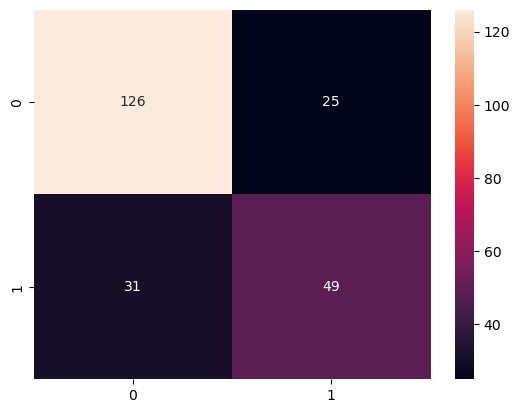

In [40]:
sns.heatmap(cnf,annot=True,fmt=".3g")

In [41]:
classi=classification_report(y_test,predict)

In [42]:
classi

'              precision    recall  f1-score   support\n\n           0       0.80      0.83      0.82       151\n           1       0.66      0.61      0.64        80\n\n    accuracy                           0.76       231\n   macro avg       0.73      0.72      0.73       231\nweighted avg       0.75      0.76      0.76       231\n'

In [43]:
print(accuracy_score(y_test,predict))

0.7575757575757576


# The main parameters used by a Random Forest Classifier are:

criterion = the function used to evaluate the quality of a split.
max_depth = maximum number of levels allowed in each tree.
max_features = maximum number of features considered when splitting a node.
min_samples_leaf = minimum number of samples which can be stored in a tree leaf.
min_samples_split = minimum number of samples necessary in a node to cause node splitting.
n_estimators = number of trees in the ensemble.

# Manual Hyperparameter Tuning

In [60]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(criterion='gini',n_estimators=500,min_samples_leaf=10,max_features='sqrt',random_state=100)

In [61]:
model.fit(X_train,y_train)

RandomForestClassifier(max_features='sqrt', min_samples_leaf=10,
                       n_estimators=500, random_state=100)

In [62]:
pred=model.predict(X_test)

In [63]:
cns=confusion_matrix(y_test,pred)

<AxesSubplot:>

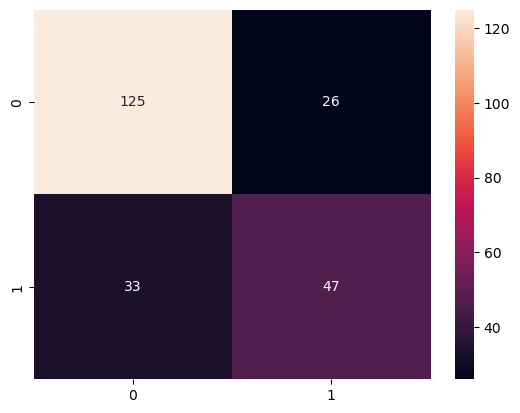

In [64]:
sns.heatmap(cns,annot=True,fmt='.3g')

In [65]:
print(accuracy_score(y_test,pred))

0.7445887445887446


In [66]:
print(classification_report(y_test,pred
                           ))

              precision    recall  f1-score   support

           0       0.79      0.83      0.81       151
           1       0.64      0.59      0.61        80

    accuracy                           0.74       231
   macro avg       0.72      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231



# Randomized Search CV:-

In [67]:
from sklearn.model_selection import RandomizedSearchCV
#Number of trees n_estimators
n_estimator=[int(x) for x in np.linspace(start=200,stop=2000,num=10)]
#features to consider at every split
max_featues=["log2",'sqrt','auto']
#maximum number of levels in a tree
max_depth=[int(x) for x in np.linspace(start=10,stop=1000,num=10)]
#minimun number of samples required to split a node
min_samples_split=[2,5,10,14]
# minimum number of samples required at each leaf node
min_samples_leaf=[1,2,4,6,8]
random_grid={'n_estimators':n_estimator,
            'max_features':max_featues,
            'max_depth':max_depth,
            'min_samples_leaf':min_samples_leaf,
            'min_samples_split':min_samples_split,
            'criterion':['gini','entropy']}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['log2', 'sqrt', 'auto'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_leaf': [1, 2, 4, 6, 8], 'min_samples_split': [2, 5, 10, 14], 'criterion': ['gini', 'entropy']}


In [68]:
rf=RandomForestClassifier()
rf_cv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=200,cv=3,verbose=2,random_state=100,n_jobs=-1)
rf_cv.fit(X_train,y_train)

Fitting 3 folds for each of 200 candidates, totalling 600 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=200,
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['log2', 'sqrt',
                                                         'auto'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=100, verbose=2)

In [69]:
rf_cv.best_params_

{'n_estimators': 1200,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 670,
 'criterion': 'entropy'}

In [81]:
best=rf_cv.best_estimator_
best

RandomForestClassifier(criterion='entropy', max_depth=670, max_features='sqrt',
                       min_samples_split=5, n_estimators=1200)

In [82]:
from sklearn.metrics import *
y_pred=best.predict(X_test)

In [83]:
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

[[123  28]
 [ 27  53]]
Accuracy Score 0.7619047619047619
Classification report:               precision    recall  f1-score   support

           0       0.82      0.81      0.82       151
           1       0.65      0.66      0.66        80

    accuracy                           0.76       231
   macro avg       0.74      0.74      0.74       231
weighted avg       0.76      0.76      0.76       231



In [75]:
from sklearn.model_selection import GridSearchCV

In [84]:
rf_cv.best_params_

{'n_estimators': 1200,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 670,
 'criterion': 'entropy'}

In [87]:
paramgrid={'n_estimators':[rf_cv.best_params_['n_estimators'],
                           rf_cv.best_params_['n_estimators']-100,
                           rf_cv.best_params_['n_estimators']-200,
                           rf_cv.best_params_['n_estimators']+200,
                            rf_cv.best_params_['n_estimators']+100
                          ],
          'criterion':[rf_cv.best_params_['criterion']],
          'max_depth':[rf_cv.best_params_['max_depth']],
          'min_samples_split': [rf_cv.best_params_['min_samples_split'] - 2,
                          rf_cv.best_params_['min_samples_split'] - 1,
                          rf_cv.best_params_['min_samples_split'], 
                          rf_cv.best_params_['min_samples_split'] +1,
                          rf_cv.best_params_['min_samples_split'] + 2],
           'min_samples_leaf': [rf_cv.best_params_['min_samples_leaf'], 
                         rf_cv.best_params_['min_samples_leaf']+2, 
                         rf_cv.best_params_['min_samples_leaf'] + 4],
           'max_features': [rf_cv.best_params_['max_features']]
          }
print(paramgrid)

{'n_estimators': [1200, 1100, 1000, 1400, 1300], 'criterion': ['entropy'], 'max_depth': [670], 'min_samples_split': [3, 4, 5, 6, 7], 'min_samples_leaf': [1, 3, 5], 'max_features': ['sqrt']}


In [88]:
rf=RandomForestClassifier()
rf_grid=GridSearchCV(estimator=rf,param_grid=paramgrid,cv=3,n_jobs=-1,verbose=2)
rf_grid.fit(X_train,y_train)

Fitting 3 folds for each of 75 candidates, totalling 225 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy'], 'max_depth': [670],
                         'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [3, 4, 5, 6, 7],
                         'n_estimators': [1200, 1100, 1000, 1400, 1300]},
             verbose=2)

In [89]:
rf_grid.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=670, max_features='sqrt',
                       min_samples_split=3, n_estimators=1100)

In [91]:
best_grid=rf_grid.best_estimator_
best_grid

RandomForestClassifier(criterion='entropy', max_depth=670, max_features='sqrt',
                       min_samples_split=3, n_estimators=1100)

In [92]:
y_predict=best_grid.predict(X_test)

In [93]:
print('Accuracy Score{}'.format(accuracy_score(y_test,y_predict)))

Accuracy Score0.7619047619047619


In [94]:
print('ClassificationReport{}'.format(classification_report(y_test,y_predict)))

ClassificationReport              precision    recall  f1-score   support

           0       0.82      0.82      0.82       151
           1       0.66      0.65      0.65        80

    accuracy                           0.76       231
   macro avg       0.74      0.74      0.74       231
weighted avg       0.76      0.76      0.76       231

